# Titanic Survival Prediction Using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
titanic.shape

(891, 15)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

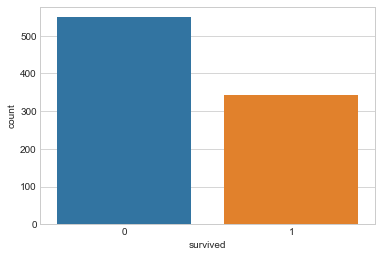

In [8]:
plt.style.use('seaborn-whitegrid')
sns.countplot(titanic['survived'],label='Count')

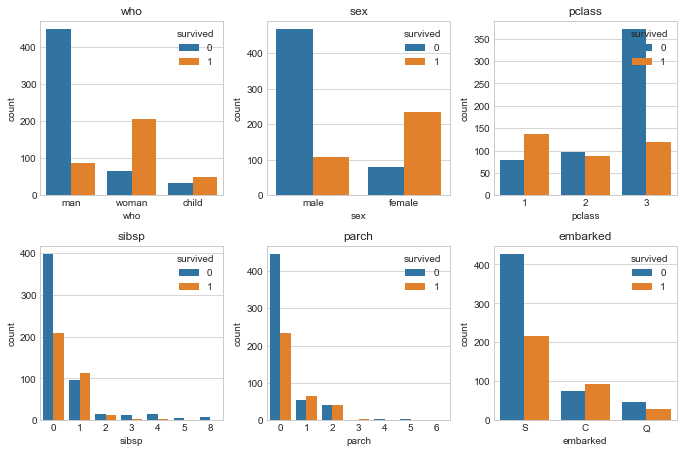

In [9]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

fig,axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        ax = axs[r][c]
        sns.countplot(titanic[cols[i]],hue=titanic['survived'],
                     ax = ax)
        ax.set_title(cols[i])
        ax.legend(title='survived',loc='upper right')
plt.tight_layout()

In [10]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [11]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


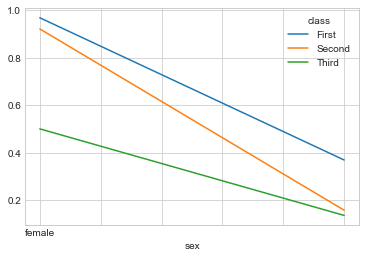

In [12]:
titanic.pivot_table('survived',index='sex',columns='class').plot()

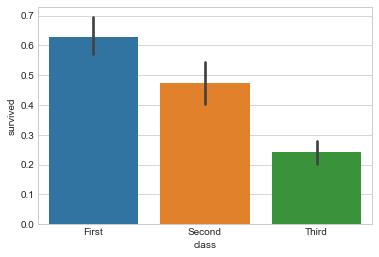

In [13]:
sns.barplot(x='class',y='survived',data=titanic)

In [14]:
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',index=['sex',age],columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

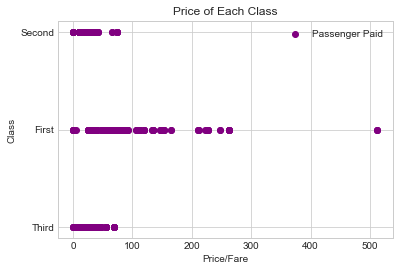

In [15]:
plt.scatter(titanic['fare'],titanic['class'],color='purple',
           label='Passenger Paid')
plt.xlabel('Price/Fare')
plt.ylabel('Class')
plt.title('Price of Each Class')
plt.legend()

In [16]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

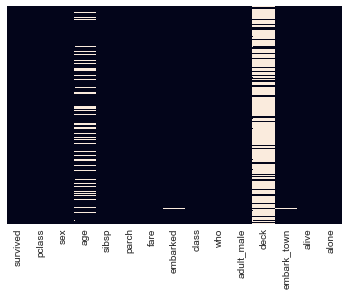

In [17]:
sns.heatmap(titanic.isnull(),cbar=False,
           yticklabels=False)

In [18]:
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

In [19]:
titanic = titanic.dropna(subset=['embarked','age'])

In [20]:
titanic.shape

(712, 8)

In [21]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [22]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
labelencoder = LabelEncoder()

In [25]:
titanic['sex'] = labelencoder.fit_transform(titanic.iloc[:,2])
titanic['embarked'] = labelencoder.fit_transform(titanic.iloc[:,7])

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [27]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = titanic.drop('survived',axis=1)
y = titanic['survived']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

In [33]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train,y_train)
    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
    
from sklearn.svm import SVC
svc_lin = SVC(random_state=0)
svc_lin.fit(X_train,y_train)
    
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train,y_train)
    
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
    
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,random_state=0)
forest.fit(X_train,y_train)
    
print('Logistic Regression Training Score: ', log.score(X_train,y_train))
print('K Nearest Neighbor Training Accuracy: ', knn.score(X_train,y_train))
print('Support Vector Machine Training Score: ', svc_lin.score(X_train,y_train))
print('Gaussian Naive Bayes Training Score: ', gauss.score(X_train,y_train))
print('Decision Tree Classifier Training Score: ', tree.score(X_train,y_train))
print('Random Forest Classifier Training Score: ', forest.score(X_train,y_train))

Logistic Regression Training Score:  0.7978910369068541
K Nearest Neighbor Training Accuracy:  0.8664323374340949
Support Vector Machine Training Score:  0.8506151142355008
Gaussian Naive Bayes Training Score:  0.8031634446397188
Decision Tree Classifier Training Score:  0.9929701230228472
Random Forest Classifier Training Score:  0.9789103690685413


In [35]:
log_pred = log.predict(X_test)
knn_pred = knn.predict(X_test)
svc_pred = svc_lin.predict(X_test)
gauss_pred = gauss.predict(X_test)
tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [37]:
print(confusion_matrix(y_test,log_pred))
print('Logistic Regression Model Testing Accuracy: ',accuracy_score(y_test,log_pred))
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('K Nearest Neighbors Model Testing Accuracy: ',accuracy_score(y_test,knn_pred))
print('\n')
print(confusion_matrix(y_test,svc_pred))
print('Support Vector Machine Model Accuracy: ',accuracy_score(y_test,svc_pred))
print('\n')
print(confusion_matrix(y_test,gauss_pred))
print(' Naive Bayes Model Testing Accuracy: ',accuracy_score(y_test,gauss_pred))
print('\n')
print(confusion_matrix(y_test,tree_pred))
print('Decision Tree Model Testing Accuracy: ',accuracy_score(y_test,tree_pred))
print('\n')
print(confusion_matrix(y_test,forest_pred))
print('Random Forest Model Testing Accuracy: ',accuracy_score(y_test,forest_pred))

[[73  9]
 [18 43]]
Logistic Regression Model Testing Accuracy:  0.8111888111888111


[[71 11]
 [20 41]]
K Nearest Neighbors Model Testing Accuracy:  0.7832167832167832


[[75  7]
 [22 39]]
Support Vector Machine Model Accuracy:  0.7972027972027972


[[69 13]
 [23 38]]
 Naive Bayes Model Testing Accuracy:  0.7482517482517482


[[60 22]
 [10 51]]
Decision Tree Model Testing Accuracy:  0.7762237762237763


[[67 15]
 [14 47]]
Random Forest Model Testing Accuracy:  0.7972027972027972
